**Submitted by : Deep Shankar Pratap Singh | Сінгх Діп Шанкар Пратап**

**Educational level: master's degree**

**subject : Deep Learning & Intelligent Systems**

**Specialty: Artificial intelligence systems**

**Study group: KNSSh-11f**

**Institute: ICNI**

**1. import Libraries**

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

from keras.preprocessing.sequence import pad_sequences


**2. Read the data**

In [2]:
data = pd.read_csv('SPAM text message 20170820 - Data.csv')

In [3]:
data.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**3. Preprocessing**

In [4]:
texts = []
labels = []
for i, label in enumerate(data['Category']):
    texts.append(data['Message'][i])
    if label == 'ham':
        labels.append(0)
    else:
        labels.append(1)
texts = np.asarray(texts)
labels = np.asarray(labels)
print("number of texts :", len(texts))
print("number of labels: ", len(labels))


number of texts : 5572
number of labels:  5572


In [5]:
# number of words used as features
max_features = 10000
# cut off the words after seeing 500 words in each document(email)
maxlen = 500

# we will use 80% of data as training, 20% as validation data
training_samples = int(5572 * .8)
validation_samples = int(5572 - training_samples)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index

data = pad_sequences(sequences, maxlen=maxlen)
np.random.seed(42)
# shuffle data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
count_vectorizer = CountVectorizer(
    max_features=max_features, stop_words="english")


In [6]:
print("Found {0} unique words: ".format(len(word_index)))
first_uni = []
for i in sequences[0]:
    first_uni.append(
        [word for word, index in word_index.items() if index == i][0])
print(first_uni)


Found 9004 unique words: 
['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']


In [7]:
# number of words used as features
max_features = 10000
# cut off the words after seeing 500 words in each document(email)
maxlen = 500


# we will use 80% of data as training, 20% as validation data
training_samples = int(5572 * .8)
validation_samples = int(5572 - training_samples)


**4. Split into train and test sets**

In [8]:
X_train = data[:training_samples]
y_train = labels[:training_samples]
X_test = data[training_samples:]
y_test = labels[training_samples:]

**5. Model -RNN**

In [9]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10,
                        batch_size=60, validation_split=0.2)


Epoch 1/10
60/60 [==============================] - 45s 715ms/step - loss: 0.3168 - acc: 0.9035 - val_loss: 0.1455 - val_acc: 0.9596
Epoch 2/10
60/60 [==============================] - 44s 740ms/step - loss: 0.1073 - acc: 0.9756 - val_loss: 0.0814 - val_acc: 0.9753
Epoch 3/10
60/60 [==============================] - 52s 864ms/step - loss: 0.1200 - acc: 0.9582 - val_loss: 0.1004 - val_acc: 0.9686
Epoch 4/10
60/60 [==============================] - 48s 799ms/step - loss: 0.1069 - acc: 0.9604 - val_loss: 0.1004 - val_acc: 0.9675
Epoch 5/10
60/60 [==============================] - 48s 806ms/step - loss: 0.0416 - acc: 0.9863 - val_loss: 0.0575 - val_acc: 0.9821
Epoch 6/10
60/60 [==============================] - 49s 821ms/step - loss: 0.0246 - acc: 0.9935 - val_loss: 0.0744 - val_acc: 0.9787
Epoch 7/10
60/60 [==============================] - 50s 836ms/step - loss: 0.0195 - acc: 0.9944 - val_loss: 0.1969 - val_acc: 0.9226
Epoch 8/10
60/60 [==============================] - 52s 864ms/step - 

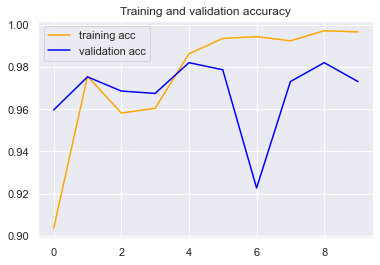

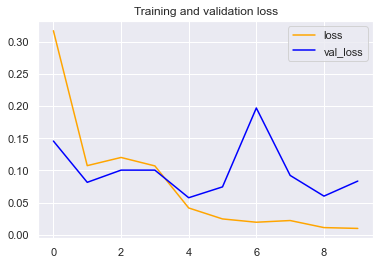

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='loss')
plt.plot(epochs, val_loss,  '-', color='blue', label='val_loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


**6. Model -LSTM**

In [11]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10,
                         batch_size=60, validation_split=0.2)

Epoch 1/10
60/60 [==============================] - 6s 61ms/step - loss: 0.2778 - acc: 0.8951 - val_loss: 0.1325 - val_acc: 0.9596
Epoch 2/10
60/60 [==============================] - 3s 55ms/step - loss: 0.0903 - acc: 0.9815 - val_loss: 0.0670 - val_acc: 0.9798
Epoch 3/10
60/60 [==============================] - 5s 85ms/step - loss: 0.0526 - acc: 0.9882 - val_loss: 0.0635 - val_acc: 0.9809
Epoch 4/10
60/60 [==============================] - 6s 107ms/step - loss: 0.0329 - acc: 0.9924 - val_loss: 0.0477 - val_acc: 0.9832
Epoch 5/10
60/60 [==============================] - 6s 107ms/step - loss: 0.0222 - acc: 0.9947 - val_loss: 0.0540 - val_acc: 0.9809
Epoch 6/10
60/60 [==============================] - 6s 107ms/step - loss: 0.0148 - acc: 0.9961 - val_loss: 0.0510 - val_acc: 0.9854
Epoch 7/10
60/60 [==============================] - 6s 108ms/step - loss: 0.0143 - acc: 0.9958 - val_loss: 0.0585 - val_acc: 0.9787
Epoch 8/10
60/60 [==============================] - 6s 108ms/step - loss: 0.007

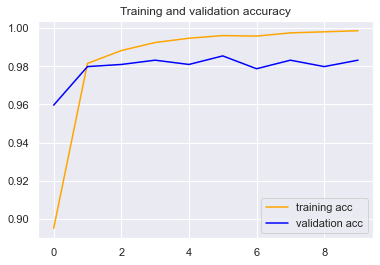

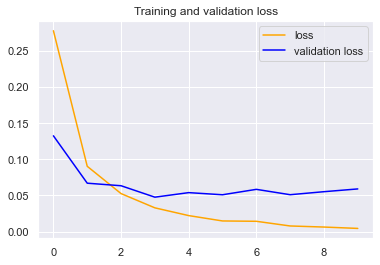

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='loss')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
